In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import DataFrames
playlist = pd.read_csv('playlistdf')
playlist.drop(['Unnamed: 0'], axis=1, inplace=True)
audio = pd.read_csv('dfaudio')
audio.drop(['Unnamed: 0'], axis=1, inplace=True)

### Data Cleaning

In [3]:
#Explore first 5 rows of playlist dataset 
playlist.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39,False,1Jx69b09LKTuBQxkEiFfVX
2,Amy Winehouse,6Q192DXotxtaysaqNPy5yR,Back To Black,Wake Up Alone,2006-01-01,0,False,4u83mwF5tUuWlXS86UOXdu
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57,False,4Musyaro0NM5Awx8b5c627
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55,False,1CkvWZme3pRgbzaxZnTl5X


In [4]:
#Explore first 5 rows of audio dataset 
audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [5]:
#Rename audio's 'id' column to 'track_id'
audio = audio.rename({'id': 'track_id'}, axis=1) 

In [6]:
audio.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,track_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,audio_features,4lCv7b86sLynZbXhfScfm2,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,audio_features,1Jx69b09LKTuBQxkEiFfVX,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,0.384,0.527,11,-5.294,0,0.0269,0.5420,0.000000,0.1560,0.222,100.730,audio_features,4u83mwF5tUuWlXS86UOXdu,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [7]:
#Merge playlist and audio dataframes for easier reference.
df = pd.merge(playlist, audio, on='track_id', how='inner')

In [8]:
#Explore new dataframe 
df.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72,False,4lCv7b86sLynZbXhfScfm2,0.638,0.826,...,0.000000,0.0803,0.649,124.072,audio_features,spotify:track:4lCv7b86sLynZbXhfScfm2,https://api.spotify.com/v1/tracks/4lCv7b86sLyn...,https://api.spotify.com/v1/audio-analysis/4lCv...,227880,4
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39,False,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,...,0.000008,0.3160,0.416,158.004,audio_features,spotify:track:1Jx69b09LKTuBQxkEiFfVX,https://api.spotify.com/v1/tracks/1Jx69b09LKTu...,https://api.spotify.com/v1/audio-analysis/1Jx6...,266227,4
2,Amy Winehouse,6Q192DXotxtaysaqNPy5yR,Back To Black,Wake Up Alone,2006-01-01,0,False,4u83mwF5tUuWlXS86UOXdu,0.384,0.527,...,0.000000,0.1560,0.222,100.730,audio_features,spotify:track:4u83mwF5tUuWlXS86UOXdu,https://api.spotify.com/v1/tracks/4u83mwF5tUuW...,https://api.spotify.com/v1/audio-analysis/4u83...,221200,3
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57,False,4Musyaro0NM5Awx8b5c627,0.609,0.629,...,0.000000,0.0978,0.325,99.955,audio_features,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55,False,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,...,0.000000,0.0527,0.522,104.945,audio_features,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4


In [9]:
#Look at the shape of the dataset 
df.shape

(10003, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10003 entries, 0 to 10002
Data columns (total 25 columns):
artist              10003 non-null object
artist_id           10003 non-null object
album               10003 non-null object
track_name          10003 non-null object
release_date        10003 non-null object
popularity          10003 non-null int64
is_explicit         10003 non-null bool
track_id            10003 non-null object
danceability        10003 non-null float64
energy              10003 non-null float64
key                 10003 non-null int64
loudness            10003 non-null float64
mode                10003 non-null int64
speechiness         10003 non-null float64
acousticness        10003 non-null float64
instrumentalness    10003 non-null float64
liveness            10003 non-null float64
valence             10003 non-null float64
tempo               10003 non-null float64
type                10003 non-null object
uri                 10003 non-null object
track

In [11]:
#Turn release_date into a Datetime object 
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')

In [12]:
#Print the value counts of the 'is_explicit' variable 
df['is_explicit'].value_counts()

False    9000
True     1003
Name: is_explicit, dtype: int64

In [13]:
#Convert "is_explicit" to a variable that is equal to 1 if True, 0 if False
df['is_explicit'] = df['is_explicit'].astype(int)

In [14]:
#Print the value counts to ensure they are the same as before 
df['is_explicit'].value_counts()

0    9000
1    1003
Name: is_explicit, dtype: int64

In [15]:
#Drop unncessary columns 
df = df.drop(['type', 'uri', 'analysis_url', 'time_signature', 'track_href'], axis=1)

In [16]:
#Explore the value counts of popularity 
df['popularity'].value_counts()

0     2953
44     157
42     155
43     150
45     145
      ... 
82      10
83       4
84       3
85       3
86       1
Name: popularity, Length: 87, dtype: int64

We see many songs that have a popularity of 0 which either means a) the popularity is not known or b) the song is quite old (according to the Spotify API documentation, popularity is indicated by play counts, and older songs may be played less). Therefore, these songs could skew our popularity results as they influence the scale of our popularity variable.

In [17]:
#Remove any popularity values that are equal to 0
df['popularity'] = df['popularity'][df['popularity'] != 0]

In [18]:
#Check for NA values 
df.isna().sum()

artist                 0
artist_id              0
album                  0
track_name             0
release_date           0
popularity          2953
is_explicit            0
track_id               0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
dtype: int64

In [19]:
#Drop NA values 
df.dropna(inplace=True)

In [20]:
#Check the value counts again
df['popularity'].value_counts()

44.0    157
42.0    155
43.0    150
45.0    145
41.0    145
       ... 
82.0     10
83.0      4
85.0      3
84.0      3
86.0      1
Name: popularity, Length: 86, dtype: int64

In [21]:
#Look at the. describe function to determine the distribution of the ratings 
df['popularity'].describe()

count    7050.000000
mean       43.071489
std        18.451087
min         1.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        86.000000
Name: popularity, dtype: float64

In [22]:
df.head()

,artist,artist_id,album,track_name,release_date,popularity,is_explicit,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,2012-03-12,72.0,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,1,0.0479,0.1390,0.000000,0.0803,0.649,124.072,227880
1,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Dreaming Out Loud,All We Are,2007-01-01,39.0,0,1Jx69b09LKTuBQxkEiFfVX,0.397,0.817,2,-5.495,1,0.0420,0.0966,0.000008,0.3160,0.416,158.004,266227
3,The Script,3AQRLZ9PuTAozP28Skbq8V,The Script,The Man Who Can't Be Moved,2008-09-08,57.0,0,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.4250,0.000000,0.0978,0.325,99.955,241467
4,Adele,4dpARuHxo51G3z768sgnrY,21,Rolling in the Deep,2011-01-19,55.0,0,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.1310,0.000000,0.0527,0.522,104.945,228293
5,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,Doo-Wops & Hooligans,Grenade,2010-10-05,75.0,0,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.1460,0.000000,0.1180,0.227,110.443,223253


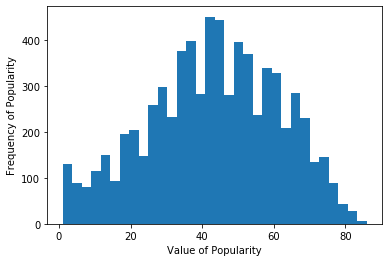

In [23]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['popularity'],bins='auto')
plt.xlabel('Value of Popularity')
plt.ylabel('Frequency of Popularity')
plt.show()

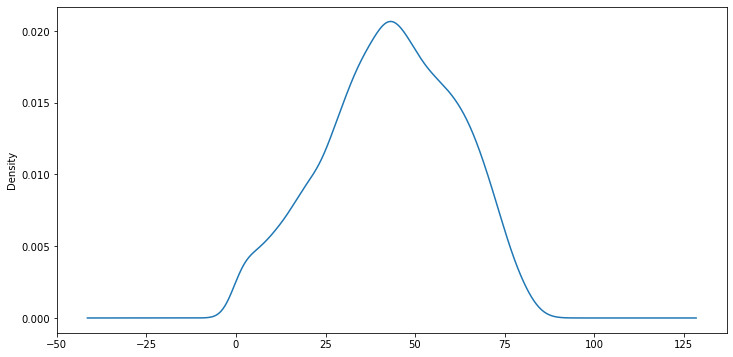

In [24]:
df['popularity'].plot(kind='kde', figsize = (12,6))
plt.show()

In [25]:
#Create a binned variable for popularity as a proxy for our ratings
df['ratings'] = df['popularity'].apply(lambda x: 1 if x <= 20 
                                       else 2 if x>= 21 and x<40 
                                       else 3 if x>=40 and x<60
                                       else 4 if x>=60 and x<80 
                                       else 5)

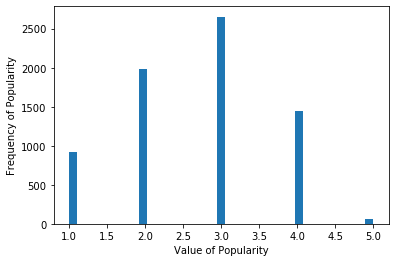

In [26]:
#Plot a histogram of the frequency of certain popularity values
plt.hist(df['ratings'],bins='auto')
plt.xlabel('Value of Popularity')
plt.ylabel('Frequency of Popularity')
plt.show()

## Data Exploration

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


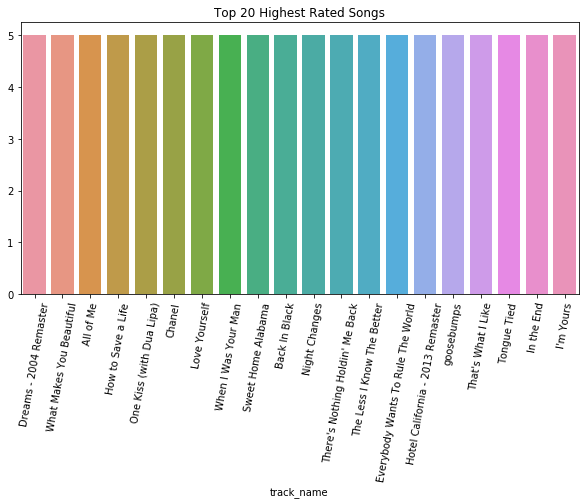

In [27]:
#Plot the top 20 highest rated songs using our new 'ratings' proxy 
plt.figure(figsize=(10,5))
topsongs = df.groupby('track_name').mean()['ratings'].sort_values(ascending=False).head(20)
sns.barplot(topsongs.index, topsongs.values)
plt.title('Top 20 Highest Rated Songs')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


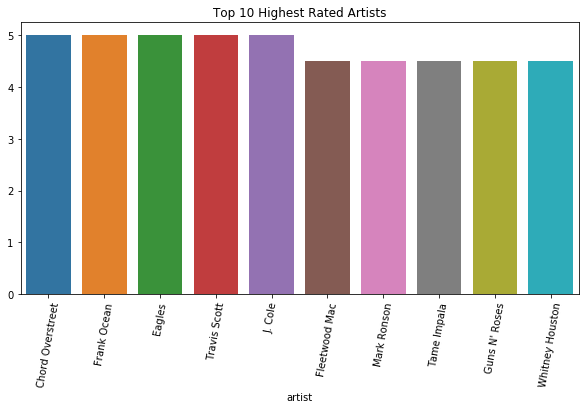

In [28]:
#Plot the top 10 highest rated artists 
plt.figure(figsize=(10,5))
topartists = df.groupby('artist').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topartists.index, topartists.values)
plt.title('Top 10 Highest Rated Artists')
plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


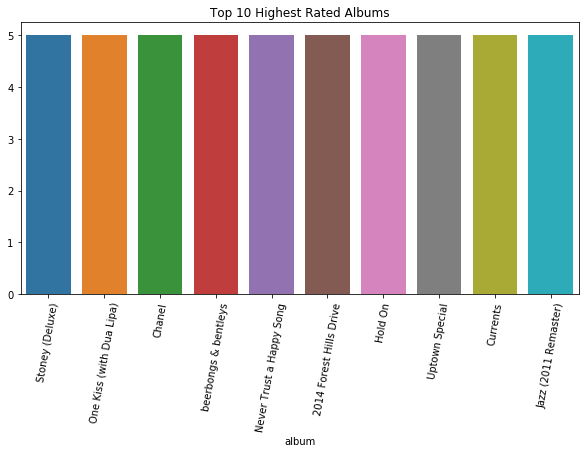

In [30]:
#Plot the top 10 highest rated albums
plt.figure(figsize=(10,5))
topalbums = df.groupby('album').mean()['ratings'].sort_values(ascending=False).head(10)
sns.barplot(topalbums.index, topalbums.values)
plt.title('Top 10 Highest Rated Albums')
plt.xticks(rotation=80);